# Este archivo corresponde al EDA de los datasets una vez ya limpios

### Fase 1: Carga de los datasets y merge de ambos

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [40]:
# Carga de los datasets
movies = pd.read_csv('movies_limpio.csv')
credits = pd.read_csv('credits_limpio.csv')

# Merge de los datasets
df = pd.merge(movies, credits, on=['id', 'id'], how='inner')

In [ ]:
# Procedemos a imprimir todos las columnas del dataframe
df.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'id_collection', 'collection', 'genre_id',
       'genre', 'companies_id', 'companies_name', 'iso', 'country_name',
       'iso_lang', 'lang_name', 'return', 'release_year', 'character',
       'actor_id', 'actor_name', 'Director'],
      dtype='object')

In [ ]:
# Procedemos a eliminar las columnas innecesarias del datafrma
df.drop(columns=['overview', 'tagline', 'id_collection', 'collection', 'genre_id', 'iso_lang', 'actor_id', 'character', 'companies_id', 'iso', 'status'], inplace=True)

In [43]:
df.head(2)

,budget,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre,companies_name,country_name,lang_name,return,release_year,actor_name,Director
0,30000000.0,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],12.451801,1995,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000.0,8844,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']",4.043035,1995,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston


#### Conociendo cómo se ven los primeros registros, revisaremos la estructura y la calidad de los datos.

In [44]:
# Ver el tamaño del dataset
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (45389, 18)


In [45]:
# Obtener información general de las columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45389 entries, 0 to 45388
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45389 non-null  float64
 1   id                 45389 non-null  int64  
 2   original_language  45378 non-null  object 
 3   popularity         45389 non-null  float64
 4   release_date       45389 non-null  object 
 5   revenue            45389 non-null  float64
 6   runtime            45143 non-null  float64
 7   title              45389 non-null  object 
 8   vote_average       45389 non-null  float64
 9   vote_count         45389 non-null  float64
 10  genre              45389 non-null  object 
 11  companies_name     45389 non-null  object 
 12  country_name       45389 non-null  object 
 13  lang_name          45389 non-null  object 
 14  return             45389 non-null  float64
 15  release_year       45389 non-null  int64  
 16  actor_name         453

#### Procedemos a extraer las columnas numericas a un nuevo dataframe para trabajar mejor

In [46]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [47]:
df_numericals = df.drop(columns=categorical_cols)

In [48]:
df_numericals = df_numericals.drop(columns=['id'])

In [49]:
df_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45389 entries, 0 to 45388
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45389 non-null  float64
 1   popularity    45389 non-null  float64
 2   revenue       45389 non-null  float64
 3   runtime       45143 non-null  float64
 4   vote_average  45389 non-null  float64
 5   vote_count    45389 non-null  float64
 6   return        45389 non-null  float64
 7   release_year  45389 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 2.8 MB


In [ ]:
df_numericals.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,4.538900e+04,45389.000000,4.538900e+04,45143.000000,45389.000000,45389.000000,4.538900e+04,45389.000000
mean,4.231430e+06,2.926460,1.122688e+07,94.173560,5.624290,110.071912,6.598537e+02,1991.884598
std,1.743750e+07,6.009157,6.438102e+07,38.345648,1.915286,491.674806,7.468260e+04,24.053387
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,0.388866,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,1.130942,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,3.692449,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000


#### Ahora que tenemos una mejor idea de la estructura y el contenido de los datos, vamos a hacer un análisis más detallado:

In [ ]:
# Observamos los valores nulos en cada columna
print("Valores nulos en cada columna:")
df.isnull().sum()

Valores nulos en cada columna:


budget                 0
id                     0
original_language     11
popularity             0
release_date           0
revenue                0
runtime              246
title                  0
vote_average           0
vote_count             0
genre                  0
companies_name         0
country_name           0
lang_name              0
return                 0
release_year           0
actor_name             0
Director             835
dtype: int64

In [ ]:
# Top 5 peliculas mas populares
top_popular_titles = df.nlargest(5, 'popularity')[['title', 'popularity']]

# Top 5 directores con mas peliculas
top_directors = df['Director'].value_counts().head(5)

# Top 5 actors with the most films
top_actors = df['actor_name'].explode().value_counts().head(5)

# Top 5 categories most present in the dataset
top_categories = df['genre'].explode().value_counts().head(5)

# Top 5 countries most present in the dataset
top_countries = df['country_name'].explode().value_counts().head(5)

# Top 5 languages most present in the dataset
top_languages = df['lang_name'].explode().value_counts().head(5)

# Create a new DataFrame with the top 5 values for each category
top_values_df = pd.DataFrame({
    'Top 5 Popular Titles': top_popular_titles['title'],
    'Popularity': top_popular_titles['popularity'],
    'Top 5 Directors': top_directors.index,
    'Number of Films by Director': top_directors.values,
    'Top 5 Actors': top_actors.index,
    'Number of Films by Actor': top_actors.values,
    'Top 5 Categories': top_categories.index,
    'Number of Films by Category': top_categories.values,
    'Top 5 Countries': top_countries.index,
    'Number of Films by Country': top_countries.values,
    'Top 5 Languages': top_languages.index,
    'Number of Films by Language': top_languages.values
})

# Display the new DataFrame
print(print('*'*20,'Top 5 Categoricals in DF', '*'*20))
top_values_df

******************** Top 5 Categoricals in DF ********************
None


,Top 5 Popular Titles,Popularity,Top 5 Directors,Number of Films by Director,Top 5 Actors,Number of Films by Actor,Top 5 Categories,Number of Films by Category,Top 5 Countries,Number of Films by Country,Top 5 Languages,Number of Films by Language
30687,Minions,547.488298,John Ford,63,[],2352,['Drama'],4998,['United States of America'],17848,['English'],22382
33339,Wonder Woman,294.337037,Michael Curtiz,61,['Georges Méliès'],24,['Comedy'],3621,[],6213,[],3770
42168,Beauty and the Beast,287.253654,Werner Herzog,52,['Louis Theroux'],15,['Documentary'],2714,['United Kingdom'],2238,['Français'],1854
43583,Baby Driver,228.032744,Alfred Hitchcock,52,['Mel Blanc'],12,[],2384,['France'],1654,['日本語'],1289
24439,Big Hero 6,213.849907,Georges Méliès,51,['Jimmy Carr'],9,"['Drama', 'Romance']",1301,['Japan'],1356,['Italiano'],1217


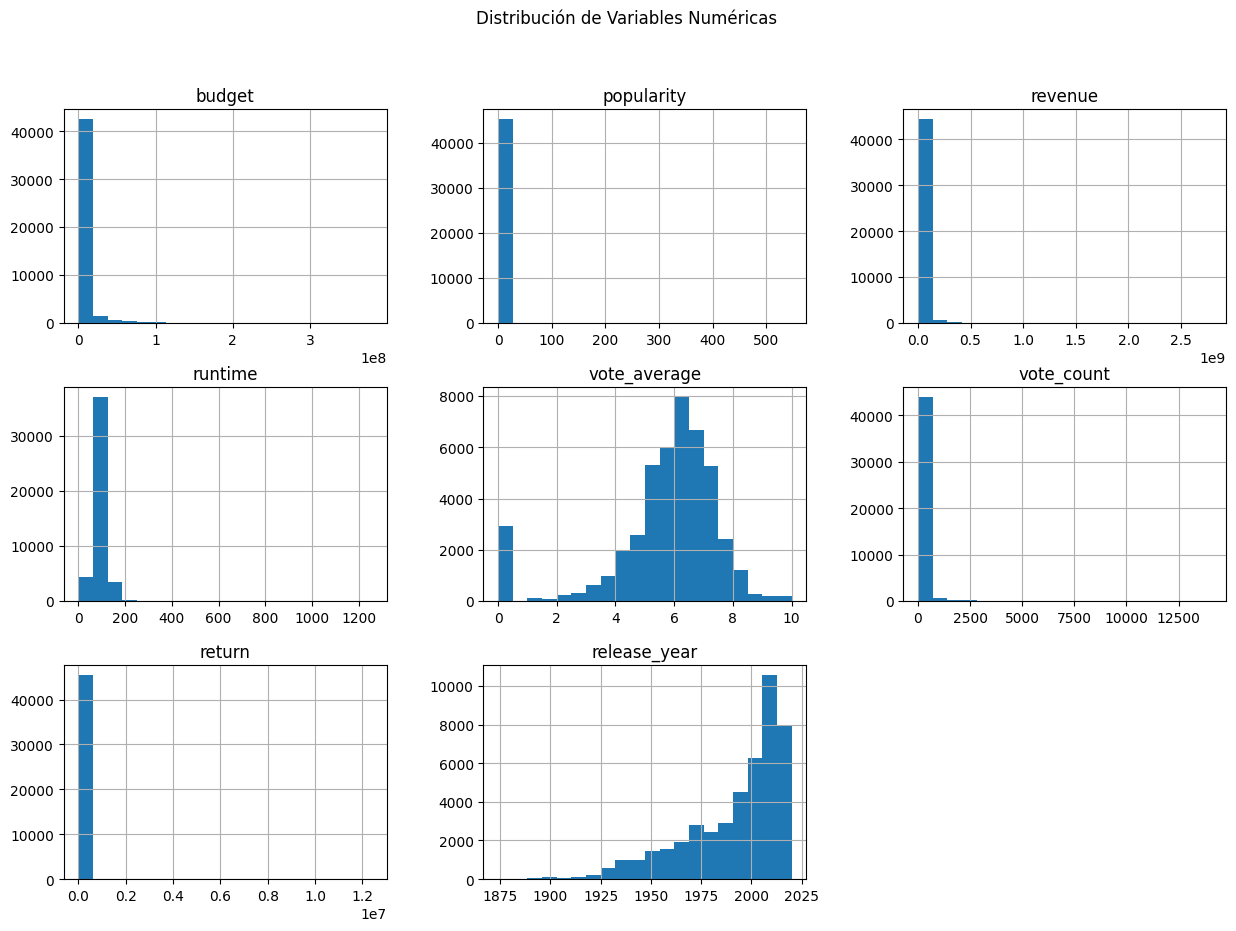

In [ ]:
# Observamos distribución de las variables numéricas
# Histograma para cada columna numérica
df_numericals.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

##### Ampliando la cantidad de peliculas por año obtenemos el siguiente grafico

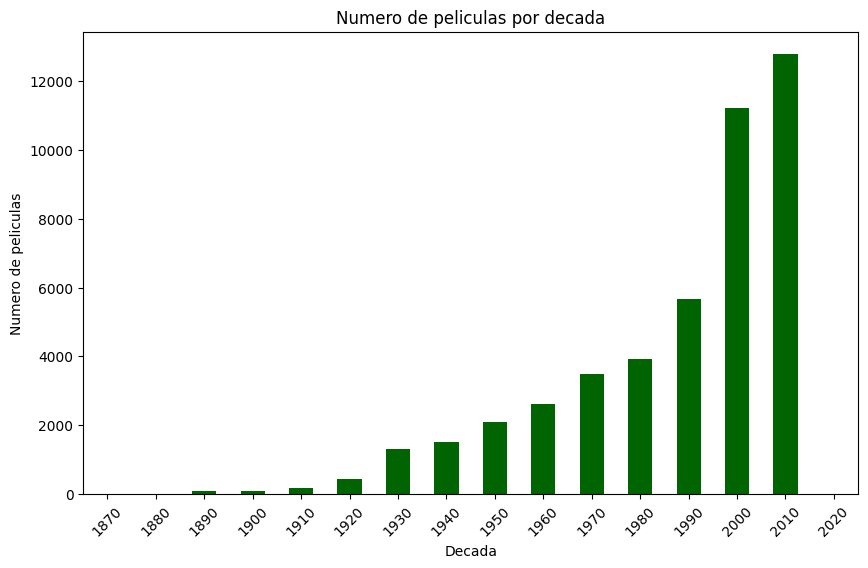

In [ ]:
# Numero de peliculas por decadas

df['release_year'] = pd.to_datetime(df['release_year'], format='%Y').dt.year

# Creamos una nueva columna con las decadas
df['decade'] = (df['release_year'] // 10) * 10

# Contamos el numero de peliculas por decada
movies_per_decade = df['decade'].value_counts().sort_index()

# Ploteamos el numero de pelicula por decadas
plt.figure(figsize=(10, 6))
movies_per_decade.plot(kind='bar', color='darkgreen')
plt.xlabel('Decada')
plt.ylabel('Numero de peliculas')
plt.title('Numero de peliculas por decada')
plt.xticks(rotation=45)
plt.show()

##### En el grafico previo se puede observar el incremento exponencial que tuvo la industria del cine a partir del nuevo milenio, donde el numero de las peliculas estrenadas dobla la cantidad de estrenos para decadas anteriores

#### Procedemos a analizar su correlacion entre ellas

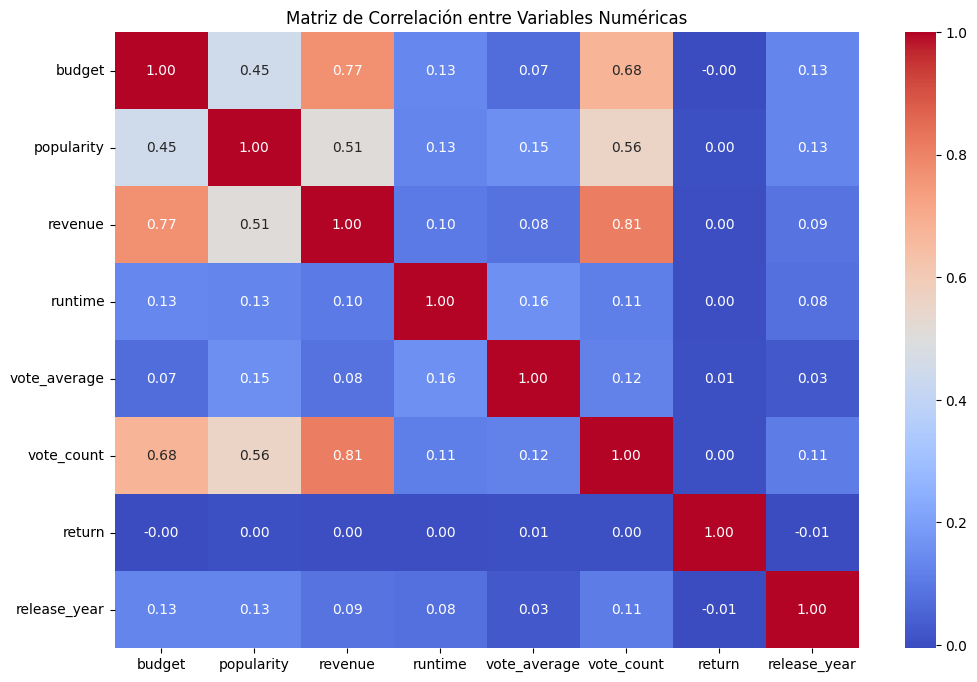

In [53]:
# Paso 2: Matriz de correlación para variables numéricas
correlation_matrix = df_numericals.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

##### Podemos notar que hay una correlacion directamente proporcional entre los valores de las columnas ['Budget', 'Popularity', 'Revenue' y 'Vote_count']. Pudiendo concluir que a mayor cantidad de votos, la pelicula cuenta con un mayor budget, es mucho mas popular y su revenue es mayor. Todo esto de igual manera partiendo de cualquiera de los 4 valores

### A continuacion se realizaron 'Nubes de palabras' con el objetivo de visualizar la frecuencia y prominencia de términos

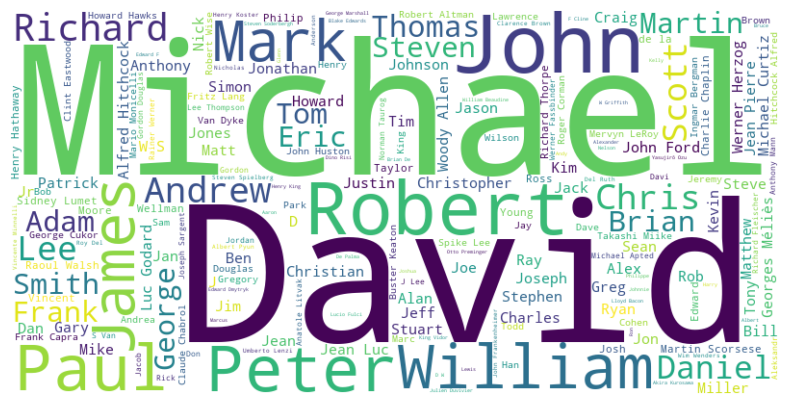

In [ ]:
# Concatenar el texto de la columna seleccionada
text_data = ' '.join(df['Director'].dropna())  # Cambia 'text_column' a la columna de texto que deseas analizar

# Definir las palabras comunes (stopwords) para eliminar
stopwords = set(STOPWORDS)
stopwords.update(["the", "and", "of"])  # Agrega palabras irrelevantes aquí

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white', colormap='viridis').generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

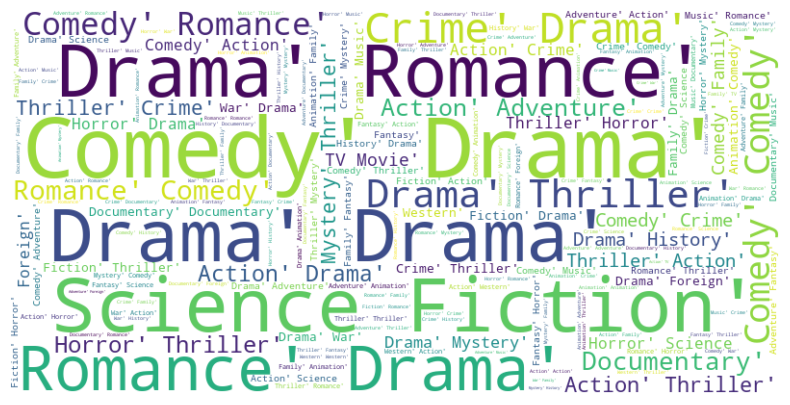

In [ ]:
# Concatenar el texto de la columna seleccionada
text_data = ' '.join(df['genre'].dropna())  # Cambia 'text_column' a la columna de texto que deseas analizar

# Definir las palabras comunes (stopwords) para eliminar
stopwords = set(STOPWORDS)
stopwords.update(["the", "and", "of"])  # Agrega palabras irrelevantes aquí

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white', colormap='viridis').generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

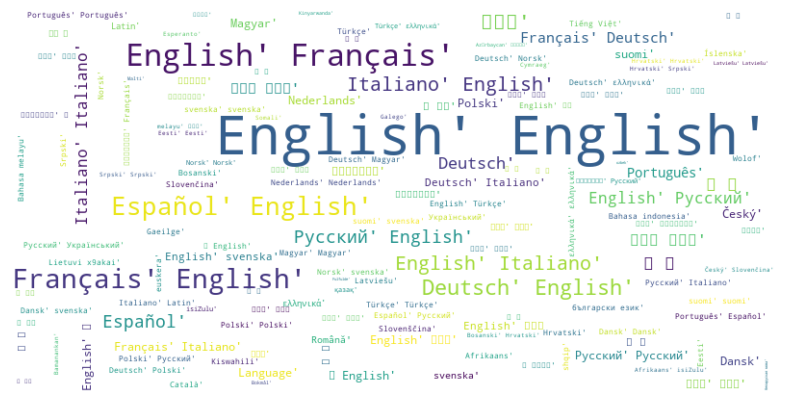

In [ ]:
# Concatenar el texto de la columna seleccionada
text_data = ' '.join(df['lang_name'].dropna())  # Cambia 'text_column' a la columna de texto que deseas analizar

# Definir las palabras comunes (stopwords) para eliminar
stopwords = set(STOPWORDS)
stopwords.update(["the", "and", "of"])  # Agrega palabras irrelevantes aquí

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white', colormap='viridis').generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

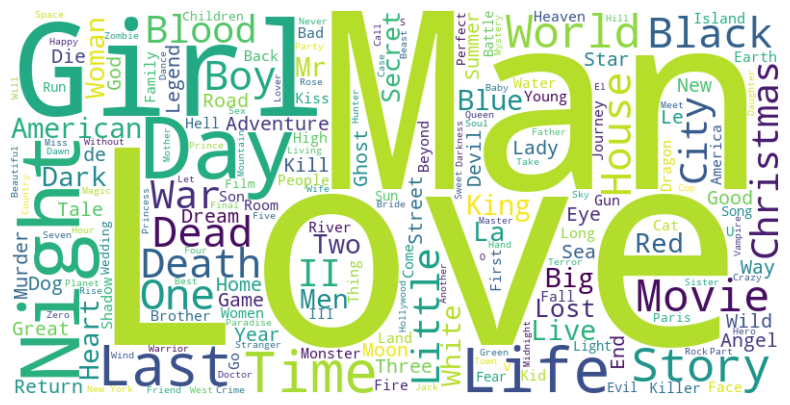

In [ ]:
# Concatenar el texto de la columna seleccionada
text_data = ' '.join(df['title'].dropna())  # Cambia 'text_column' a la columna de texto que deseas analizar

# Definir las palabras comunes (stopwords) para eliminar
stopwords = set(STOPWORDS)
stopwords.update(["the", "and", "of"])  # Agrega palabras irrelevantes aquí

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white', colormap='viridis').generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()